In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Salary_Data.csv')

In [4]:
data.sample(5)

,YearsExperience,Salary
12,4.0,56957.0
21,7.1,98273.0
7,3.2,54445.0
9,3.7,57189.0
16,5.1,66029.0


In [5]:
X=data.iloc[:,0].values
Y=data.iloc[:,1].values

In [182]:
class LinearRegression:
    def __init__(self):
        self.m=1
        self.c=1
    def derivated(self,x,y):
        eq=self.m*x+self.c
        der_m=2* sum(x*(eq-y))
        der_c=2*sum(eq-y)
        return der_m,der_c    
    def fit(self,x,y):
        for i in range(999):
            s_m,s_c=self.derivated(x,y)
            LR=0.001
            old_m=self.m
            old_c=self.c
            new_m=self.m-(LR*s_m)
            new_c=self.c-(LR*s_c)
            if(abs(old_m-new_m)<=0.001 and abs(old_c-new_c)<=0.001):
                break
            else:
                self.m=new_m
                self.c=new_c
        return self
    def predict(self,x1):
        return self.m*x1+self.c

In [183]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [184]:
reg=LinearRegression()
reg.fit(X_train,Y_train) #training

In [188]:
Y_pred=reg.predict(X_test) #predicting

In [186]:
from sklearn.metrics import r2_score
r2_score(Y_pred,Y_test) #accuracy

0.9700493318815433

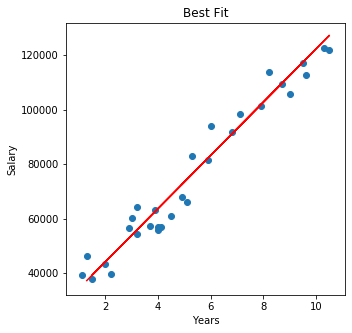

In [187]:
plt.figure(figsize=(5,5))
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X,Y)
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Best Fit")
plt.show()